In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import umap
import math as mef
from icecream import ic
import textalloc as ta
from random import uniform

In [20]:
dataset_length = 10001
number_of_periods = 5
number_of_phases = 201
x = np.linspace(0,number_of_periods*2*mef.pi,dataset_length)
phases_linear = np.linspace(0,2*mef.pi,number_of_phases)
phases_random = []
for i in range(0,number_of_phases):
    phases_random.append(uniform(0,2*mef.pi))

phases_random.sort()

#ic(len(phases_random), len(phases_linear))

y_lin_dict = {}
y_rand_dict = {}
for j in range(0,len(phases_linear)):
    #ic(j)
    philin = phases_linear[j]
    phiran = phases_random[j]
    y_lin_dict[str(philin)] = [mef.sin(xx - philin)+1 for xx in x]
    y_rand_dict[str(phiran)] = [mef.sin(xx - phiran)+1 for xx in x]
    
dF_lin = pd.DataFrame(y_lin_dict, index = x)
dF_lin = pd.DataFrame.transpose(dF_lin)

dF_rand = pd.DataFrame(y_rand_dict, index = x)
dF_rand = pd.DataFrame.transpose(dF_rand)
#ic(y_lin_dict,y_rand_dict)

dF_rand.head()

,0.000000,0.003142,0.006283,0.009425,0.012566,0.015708,0.018850,0.021991,0.025133,0.028274,...,31.387652,31.390794,31.393935,31.397077,31.400219,31.403360,31.406502,31.409643,31.412785,31.415927
0.10299780608489081,0.897184,0.900310,0.903436,0.906563,0.909692,0.912821,0.915951,0.919082,0.922214,0.925346,...,0.869105,0.872220,0.875336,0.878454,0.881573,0.884693,0.887814,0.890936,0.894060,0.897184
0.16198803986469623,0.838719,0.841821,0.844924,0.848028,0.851134,0.854241,0.857350,0.860460,0.863572,0.866684,...,0.810883,0.813969,0.817057,0.820146,0.823238,0.826331,0.829425,0.832522,0.835620,0.838719
0.17342257942421696,0.827445,0.830541,0.833638,0.836736,0.839837,0.842938,0.846042,0.849147,0.852253,0.855361,...,0.799668,0.802747,0.805828,0.808910,0.811995,0.815081,0.818170,0.821260,0.824352,0.827445
0.18947070808114322,0.811661,0.814747,0.817835,0.820925,0.824017,0.827110,0.830205,0.833302,0.836401,0.839501,...,0.783972,0.787040,0.790111,0.793183,0.796258,0.799335,0.802413,0.805494,0.808576,0.811661
0.2064512623550574,0.795012,0.798088,0.801166,0.804246,0.807328,0.810411,0.813497,0.816584,0.819673,0.822764,...,0.767424,0.770480,0.773539,0.776600,0.779664,0.782729,0.785797,0.788867,0.791938,0.795012


In [21]:
k = 10
m_d = 0
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=k, min_dist=m_d)
embedding_lin = reducer.fit_transform(dF_lin)
embedding_rand = reducer.fit_transform(dF_rand)

In [14]:
clrmap = plt.cm.gist_ncar

Number of clusters: 1


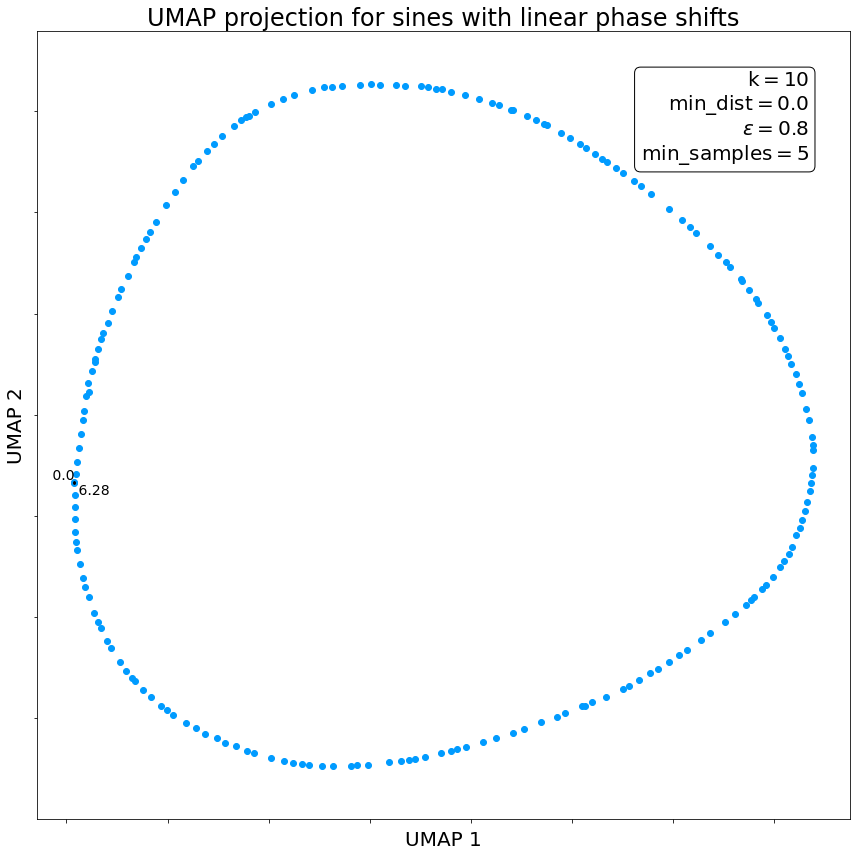

In [22]:
embedding = embedding_lin
# embedding = embedding_rand

data_set = dF_lin
# data_set = dF_rand

%matplotlib inline

epsilon = 0.8
m_s = 5
db = DBSCAN(eps=epsilon, min_samples=m_s).fit(embedding)
labels = db.labels_
unique_labels = set(labels)
colors = [clrmap(each) for each in np.linspace(0.15, 0.85, len(unique_labels))]
print("Number of clusters: " + str(len(unique_labels)))

plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(labels)):
    col = colors[labels[i]]
    ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
#Store the first and last simulation that is assigned to a cluster to obtain 
#the lowest and highest temperature belonging to one class

first = []
last = []

for cluster_label in unique_labels:
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            first.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, horizontalalignment='right', verticalalignment='bottom')
            break
    for i in range(len(labels)-1, -1, -1):
        if labels[i] == cluster_label:
            last.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, verticalalignment='top')
            break

textstr = '\n'.join((
    r'$\mathrm{k}=%.0f$' % (int(k), ),
    r'$\mathrm{min\_dist}=%.1f$' % (m_d, ),
    r'$\epsilon=%.1f$' % (epsilon, ),
    r'$\mathrm{min\_samples}=%.0f$' % (m_s, )))

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.95, 0.89, textstr, transform=ax.transAxes, fontsize=20,
    verticalalignment='center',horizontalalignment='right', bbox=props)
            
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection for sines with linear phase shifts', fontsize=24)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.xlabel('UMAP 1',fontsize=20)
plt.ylabel('UMAP 2',fontsize=20)
plt.tight_layout()
plt.show()


Number of clusters: 13


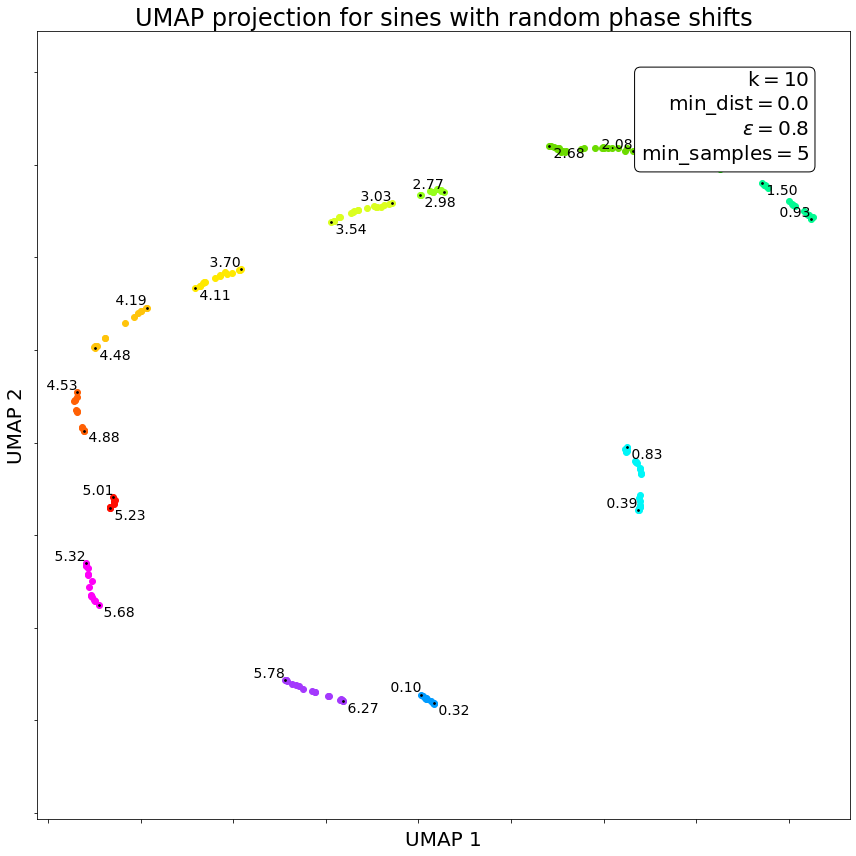

In [23]:
# embedding = embedding_lin
embedding = embedding_rand

# data_set = dF_lin
data_set = dF_rand

%matplotlib inline

epsilon = 0.8
m_s = 5
db = DBSCAN(eps=epsilon, min_samples=m_s).fit(embedding)
labels = db.labels_
unique_labels = set(labels)
colors = [clrmap(each) for each in np.linspace(0.15, 0.85, len(unique_labels))]
print("Number of clusters: " + str(len(unique_labels)))

plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(labels)):
    col = colors[labels[i]]
    ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
#Store the first and last simulation that is assigned to a cluster to obtain 
#the lowest and highest temperature belonging to one class

first = []
last = []

for cluster_label in unique_labels:
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            first.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, horizontalalignment='right', verticalalignment='bottom')
            break
    for i in range(len(labels)-1, -1, -1):
        if labels[i] == cluster_label:
            last.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, verticalalignment='top')
            break

textstr = '\n'.join((
    r'$\mathrm{k}=%.0f$' % (int(k), ),
    r'$\mathrm{min\_dist}=%.1f$' % (m_d, ),
    r'$\epsilon=%.1f$' % (epsilon, ),
    r'$\mathrm{min\_samples}=%.0f$' % (m_s, )))

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.95, 0.89, textstr, transform=ax.transAxes, fontsize=20,
    verticalalignment='center',horizontalalignment='right', bbox=props)
            
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection for sines with random phase shifts', fontsize=24)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.xlabel('UMAP 1',fontsize=20)
plt.ylabel('UMAP 2',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
def find_optimal_layout(N):
    o_l = {1:(1,1),2:(2,1),3:(3,1),4:(4,1),5:(3,2),6:(3,2),7:(4,2),8:(4,2),9:(3,3),10:(4,3),11:(4,3),12:(4,3),13:(4,4),14:(4,4),15:(4,4),16:(4,4)}
    return o_l[N]

def find_numbers(n,m):
    base = []
    plots = []
    start = n
    for col in range(0,m):
        base.append(start+col+1)
    for count_n in range(0,n):
        for count_m in range(0,m):
            plots.append(base[count_m]+count_n*(n+m))
    return plots

def find_minmax(ds):
    minmin = 99999
    maxmax = -99999
    indexskipped = False
    for Tempeh in ds: #Tempeh is temperature
        if indexskipped == False:
            indexskipped = True
            continue 
        tractor = ds[Tempeh][:numsteps] #tractor is trace
        #ic(tractor)
        thismin = min(tractor)
        thismax = max(tractor)
        #ic(thismax)
        #ic(maxmax)
        if thismin < minmin:
            minmin = thismin
        if thismax > maxmax:
            maxmax = thismax
    #ic(minmin,maxmax)
    return minmin,maxmax

def find_title():
    #ic()
    if exp.__contains__('LONG'):
        title = f'UMAP for cell {cell} after t=4.0s'
    elif exp.__contains__('nopulse'):
        if setname.__contains__('all'):
            title = f"UMAP for cell {cell} using all traces"
        else:
            title = f"UMAP for cell {cell}"
    elif exp.__contains__('clamps'):
        title = f"UMAP for cell {cell}, exposed to voltage clamps"
    else:
        # When a pulse is given
        if setname.__contains__('all'):
            title = f"UMAP for cell {cell} using all traces, exposed to a current clamp"
        else:
            title = f"UMAP for cell {cell}, exposed to a current clamp"
    #ic(title)
    return title
 
ic(k)
ic(m_d)
ic(epsilon)
ic(m_s)

if transientless == True:
    if not exp.__contains__('LONG'):
        numsteps = 8001
    else: 
        numsteps = 10001
else:
    if exp.__contains__('clamps'):
        numsteps = 30001
    else:
        numsteps = 10001
    
minv, maxv = find_minmax(pd.DataFrame.transpose(data_set))

diff = maxv - minv
maxv = maxv + 0.1*diff
minv = minv - 0.1*diff

N = len(unique_labels)
n,m = find_optimal_layout(N)

fig,axes = plt.subplots(nrows=2, ncols=2, gridspec_kw={'width_ratios': [n*10-2*m, m*10], 'height_ratios': [n*10+2*m, m*10]})
for aa in range(0,len(axes)):
    for bb in range(0,len(axes)):
        if aa == 0 and bb == 0:
            donothing = True
        else:
            axes[aa,bb].axis('off')
ax = axes[0,0]
ax.set_aspect('equal', 'datalim')
#ax = fig.add_subplot(111)

for i in range(len(labels)):
    col = colors[labels[i]]
    ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
#Store the first and last simulation that is assigned to a cluster to obtain 
#the lowest and highest temperature belonging to one class

first = []
last = []
first_traces = []
last_traces = []
labelslab = []

labels_locs = [[],[]]

for cluster_label in unique_labels:
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            first.append(data_set.iloc[i].name)
            first_traces.append(data_set.iloc[i].name.split('degC')[0]+chr(176)+'C')
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            labelslab.append(label.split('degC')[0])
            labels_locs[0].append(embedding[i][0])
            labels_locs[1].append(embedding[i][1])
            #ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), fontsize = 14, horizontalalignment='center', verticalalignment='bottom')
            break
    for i in range(len(labels)-1, -1, -1):
        if labels[i] == cluster_label:
            last.append(data_set.iloc[i].name)
            last_traces.append(data_set.iloc[i].name.split('degC')[0]+chr(176)+'C')
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            labelslab.append(label.split('degC')[0])
            labels_locs[0].append(embedding[i][0])
            labels_locs[1].append(embedding[i][1])
            #ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), fontsize = 14, horizontalalignment='right',verticalalignment='bottom')
            break

# textstr = '\n'.join((
#     r'$\mathrm{k}=%.0f$' % (int(k), ),
#     r'$\mathrm{min\_dist}=%.1f$' % (m_d, ),
#     r'$\epsilon=%.1f$' % (epsilon, ),
#     r'$\mathrm{min\_samples}=%.0f$' % (m_s, )))

# props = dict(boxstyle='round', facecolor='white', alpha=1)
# ax.text(0.95, 0.89, textstr, transform=ax.transAxes, fontsize=20,
#     verticalalignment='center',horizontalalignment='right', bbox=props)
# plt.title(f'UMAP projection for cell {cell} after t=4.0s', fontsize=24)

ta.allocate_text(fig,ax,labels_locs[0],labels_locs[1],
            labelslab,
            x_scatter=embedding[:, 0], y_scatter=embedding[:, 1],
            max_distance=0.2,
            min_distance=0.04,
            margin=0.039,
            linewidth=1,
            nbr_candidates=400,
            textsize=15)

ax.set_title(f'UMAP projection', fontsize=20)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set_xlabel('UMAP 1',fontsize=15)
ax.set_ylabel('UMAP 2',fontsize=15)
ax.text(-0.1, 1.05, 'A', transform=ax.transAxes, 
            size=30, weight='bold')

test_x = np.linspace(0,1000,1000)
test_y = test_x

ax = axes[1]
plot_numbers = find_numbers(n,m)
#print(n+m,n+m,plot_numbers)
for cluster_label in unique_labels:
    ax = fig.add_subplot(n+m, n+m, plot_numbers[cluster_label])
    col = colors[cluster_label]
    col_low = colors_low[cluster_label]
    col_high = colors_high[cluster_label]
    #data_setT[[first[cluster_label], last[cluster_label]]].plot(color={tuple(col_low),tuple(col_high)})  
    (data_setT[first[cluster_label]][:numsteps]*1000).plot(color='k') 
    (data_setT[last[cluster_label]][:numsteps]*1000).plot(color=tuple(col))
    #ax.set_title(f'{first[cluster_label]} - {last[cluster_label]}')
    if cluster_label >= len(unique_labels)-m:
        plt.xlabel('time (s)', fontsize=16)
        lablablab = ax.get_xticklabels()
        labeltjes = []
        for ll in lablablab:
            value = ll.get_text().split('_')[0]
            labeltjes.append(value)
        #ic(labeltjes)
        ax.set_xticklabels(labeltjes)
    else:
        ax.set_xticklabels([])
    if int((cluster_label + 1) % m) == 1 or m == 1:
        plt.ylabel('voltage (mV)', fontsize=16)
    else:
        ax.set_yticklabels([])
    
    if len(unique_labels)==1:
        #print("Here!")
        plt.axis('on')
        plt.xlabel('time (s)', fontsize=20)
        plt.ylabel('voltage (mV)', fontsize=20)
    
    ax.set_ylim([minv*1000,maxv*1000])
    ax.legend([first_traces[cluster_label], last_traces[cluster_label]], fontsize=13,loc="upper right")
    if cluster_label == -1:
        ax.set_title("Outlier:")
    ax.grid(True)
    
    if cluster_label == 0:
        ax.text(-0.1, 1+(0.06*n), 'B', transform=ax.transAxes, 
            size=30, weight='bold')

fig.suptitle('Test')
        
#fig.tight_layout()
st = find_title()
plt.suptitle(st, fontsize=25)
#plt.show()

plt.savefig(f'./Figures/UMAP_{cell}_{setname}_{exp}_{trantran}_k{k}_md{m_d}_eps{epsilon}_ms{m_s}.png',bbox_inches='tight')